##  Load market datas

In [1]:
%matplotlib inline
from pragmaticquant import market
   
mkt_datas = market.MarketDatas.load_json('mkt.json')
mkt = market.Market(mkt_datas) 
print('Market RefDate = %s' % mkt.refdate())

Market RefDate = 2015-04-29 00:00:00


In [2]:
underlying = 'SP500'
maturities = ['1m', '3m', '6m', '9m', '1y', '18m', '2y', '4y', '5y', '7y', '10y', '15y']

## Equity Forward Curve

Spot SP500 = 1.0


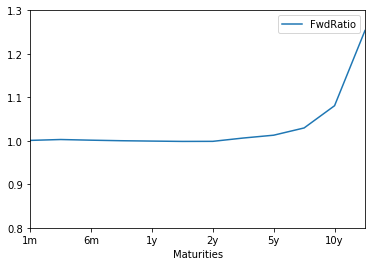

In [3]:
spot = mkt.assetspot('SP500')
fwd_curve = {'Maturities':maturities, 'FwdRatio':[mkt.assetforward(underlying, mat)/spot for mat in maturities]}    

from pandas import DataFrame

print('Spot %s = %s' % (underlying, spot))
DataFrame(data=fwd_curve).plot(x='Maturities', y = 'FwdRatio', ylim=(0.8, 1.3))

## Equity Smile

In [12]:
from numpy import linspace, array

moneyness_min = 0.1
moneyness_max = 2.0

moneynesses = linspace(moneyness_min, moneyness_max, 51)
strikes = [spot * m for m  in moneynesses]
smile_df=DataFrame(data= array(mkt.assetvol(underlying, maturities, strikes)).transpose(),
                   index=strikes, columns=maturities)

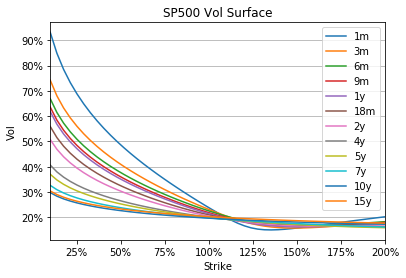

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def pct_formater(nb_digits: int=0):
    format_spec = '0.{nb_digits}%'.format(nb_digits=int(nb_digits))
    return FuncFormatter(lambda x,y: format(x, format_spec))

ax = smile_df.plot(y = maturities)
ax.grid(True, axis='y')
ax.set_title('SP500 Vol Surface')
ax.set_ylabel('Vol')
ax.yaxis.set_major_formatter(pct_formater())
ax.set_xlabel('Strike')
ax.xaxis.set_major_formatter(pct_formater())